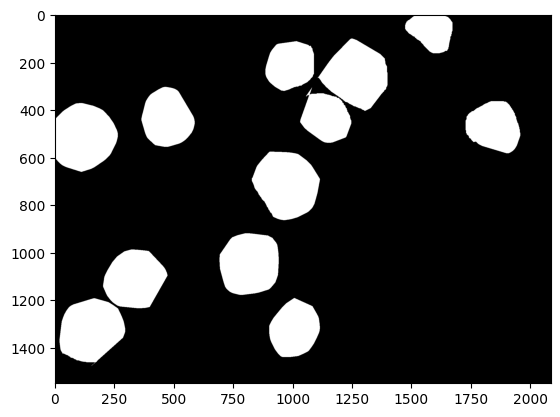

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def build_mask_from_xml(filename):   
    tree = ET.parse(filename)
    root = tree.getroot()
    width=int(root.get('width'))
    height=int(root.get('height'))
    # Create a black image with the specified dimensions
    img = np.zeros((height, width, 3), np.uint8)
    # all items data
    for region in root.iter('FreeHand'):
        lista=[]
        if region.get('VISIBLE') == '1':
            for point in region:
                x=int(point.get('x'))
                y=int(point.get('y'))
                lista.append([x,y])
                # Define an array of points
            points=np.array(lista)
            cv.fillPoly(img, pts=[points], color=(255, 255, 255))
    return img

filename='pilchardTrue.xml'
img = build_mask_from_xml(filename)
plt.imshow(img, cmap = 'gray')
